# Homework 3 - Feedforward Neural Networks

In this assignment, you implement a simple two layer feedforward neural network where the first layer has ReLU activations and the second layer has a softmax (for classification) using numpy. You need to compute the gradients yourself (no autograd using TensorFlow, PyTorch, etc.), implement forward and backward propagation, and visualize the learned decision boundaries.

## Task 1: Generate and Visualize the Data

First, let's generate a synthetic 2D dataset and visualize it.

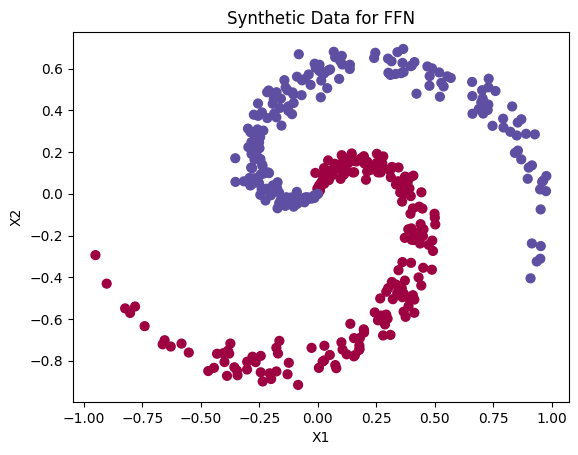

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic 2D dataset (spiral with wings for each class)
np.random.seed(0)
N = 200  # number of points per class
D = 2    # dimensionality
K = 2    # number of classes
X = np.zeros((N*K, D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Synthetic Data for FFN')
plt.show()

## Task 2: Implement the Feedforward Neural Network

### Step 1: Initialize Parameters (1pt)

Let's start by initializing the model parameters.

In [2]:
def initialize_parameters(input_dim, hidden_dim, output_dim):
    np.random.seed(0)

    #TODO: Initialize the weight and bias parameters for the two layers
    W1 = np.random.rand(input_dim, hidden_dim) # Weight matrix for 1st layer
    b1 = np.random.rand(1, hidden_dim) # Bias vector for 1st layer
    W2 = np.random.randn(hidden_dim, output_dim) # Weight matrix for 2nd layer
    b2 = np.random.rand(1, output_dim) # Bias vector for 2nd layer
    return W1, b1, W2, b2

input_dim = 2
hidden_dim = 100
output_dim = 2

W1, b1, W2, b2 = initialize_parameters(input_dim, hidden_dim, output_dim)

### Step 2: Implement Activation Functions (1 pt)

Implement the ReLU activation function and the softmax function.

In [3]:
def relu(z):
    #TODO: Implement the ReLU activation function. Note that z is a vector, so ReLU needs to be applied to each element
   return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stabilize exponentiation
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)  # Return index of max probability

### Step 3: Implement the Forward Propagation

The forward propagation step has already been implemented for you.

In [4]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Step 4: Compute the Loss (1 pt)

Implement the function to compute the cross-entropy loss.

In [5]:
def compute_loss(y, y_pred):
    #TODO: Compute the cross-entropy loss. Remember to normalize the loss by the length of y
    m = y.shape[0]  # Number of examples

    epsilon = 1e-8  # Small value to prevent log(0)

    log_probs = -np.log(y_pred[np.arange(m), y] + epsilon)
    loss = np.sum(log_probs) / m  # Normalize by batch size

    return loss

### Step 5: Implement the Backward Propagation (1 pt)

Compute the gradients.

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def one_hot_encode(y, num_classes):
    y_one_hot = np.zeros((y.size, num_classes))
    y_one_hot[np.arange(y.size), y] = 1
    return y_one_hot

# Define the derivative of the sigmoid function
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def backward_propagation(X, y, Z1, A1, Z2, A2, W2):
    # TODO:Compute the four gradients. You can include additional auxiliary variables if you like

    m = X.shape[0]

    # Look at one hot encoding to preprocess y to match the shape of A2
    y = one_hot_encode(y, K)

    loss_derivative  = A2 - y

    dW2 = (1 / m) * np.dot(A1.T, loss_derivative) # (hidden_units, num_classes)
    db2 = (1 / m) * np.sum(loss_derivative, axis=0, keepdims=True) # (1, num_classes)

    # Compute hidden layer error
    delta1 = np.dot(loss_derivative, W2.T) * (A1 > 0)  # Shape (m, hidden_units)

    dW1 = (1 / m) * np.dot(X.T, delta1)  # (input_dim, hidden_units)
    db1 = (1 / m) * np.sum(delta1, axis=0, keepdims=True)  # (1, hidden_units)

    return dW1, db1, dW2, db2

### Step 6: Update Parameters Using Gradient Descent


In [7]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

### Step 7: Train the Model

If you have completed all of the previous steps, let's now train the model using gradient descent and plot the loss over iterations.

Iteration 0: Loss = 3.328413328657902
Iteration 1000: Loss = 0.02190054088194468
Iteration 2000: Loss = 0.015205656192632817
Iteration 3000: Loss = 0.01247653916155305
Iteration 4000: Loss = 0.010929694032360935
Iteration 5000: Loss = 0.009911464186308339
Iteration 6000: Loss = 0.009170134626964985
Iteration 7000: Loss = 0.008609241508275876
Iteration 8000: Loss = 0.008165700429630454
Iteration 9000: Loss = 0.007802813483702938


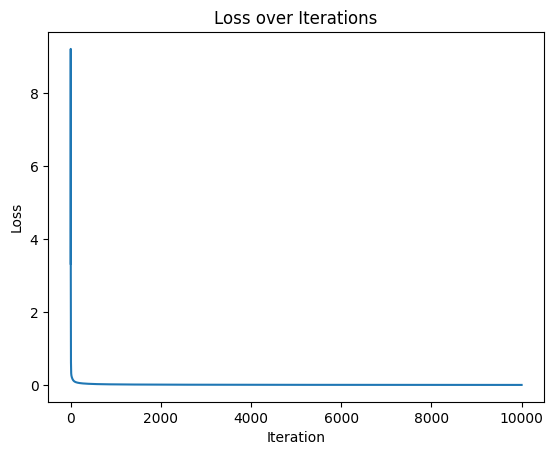

In [8]:
num_iterations = 10000
learning_rate = 1e-0
loss_history = []

for i in range(num_iterations):
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
    loss = compute_loss(y, A2)
    loss_history.append(loss)

    dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, A2, W2)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    if i % 1000 == 0:
        print(f'Iteration {i}: Loss = {loss}')

# Plot the loss over iterations
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

## Task 3: Visualize the Decision Boundary

Now, let's visualize the decision boundary learned by the model.

Experiment with different hyperparameters such as the learning rate, the number of hidden units, the random initialization (e.g., 0.1 * randn, 0.01 * randn, 100 * randn, etc.), and number of iterations. Report your findings and how they affect the model's performance and decision boundary.

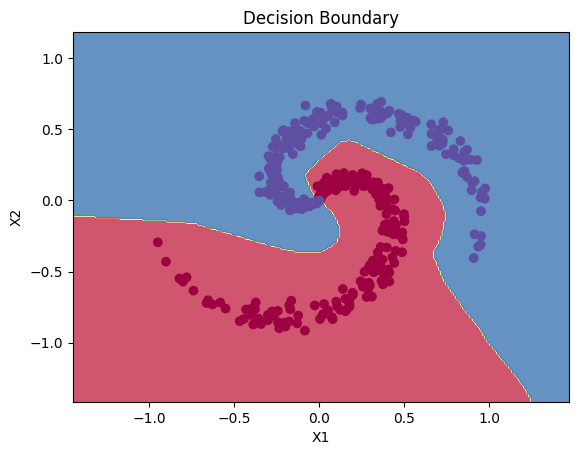

In [9]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')
    plt.show()

def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

plot_decision_boundary(lambda x: predict(x, W1, b1, W2, b2))